# Gradijenti i širenje greške

<center><img src="Images/V7_banner.png" width="700" height="700"/></center>

Cilj ove vježbe je razumjeti kako se računa gradijent. U protekloj vježbi objašnjen je postupak gradijentnog spusta i kako se pomoću gradijenta ažuriraju parametri neuronske mreže. Ostaje odgovoriti kako se točno u velikoj neuronskoj mreži izračunata pogreška putem funkcije cilja propagira do svakog gradijenta. 


Računanje gradijenata odvija se u tri koraka: **propagacija prema naprijed**, **izračun gubitka** i **propagacija prema natrag.**

---

## Propagacija prema naprijed

U **propagaciji prema naprijed** vrijednost uzorka $x$ postavlja se na ulaz neuronske mreže te prolazi kroz sve slojeve množeći se sa težinama, pribrajući čvorove pristranosti, aktivrajući se aktivacijskim funkcijama do izlaznog neurona $y$. Drugim riječima vrijedi izraz

\begin{align}
y = f(x)
\end{align}

gdje $f(\cdot)$ predstavlja cijelokupnu neuronsku mrežu.

---

<font color='red'>


## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Idući kod implementira i prikazuje neuronsku mrežu. Proučite kako se ista zadaje programu. Istražite različite mogućnosti topologije neuronske mreže i za svaku predvidite broj parametara. Otkrijte što znači oznaka $r$ a što znači $\sigma$. Isto tako protumačite *f* i *h* oznake. Napišite formulu za *f* oznaku proizvojljno odabranog sloja!

---



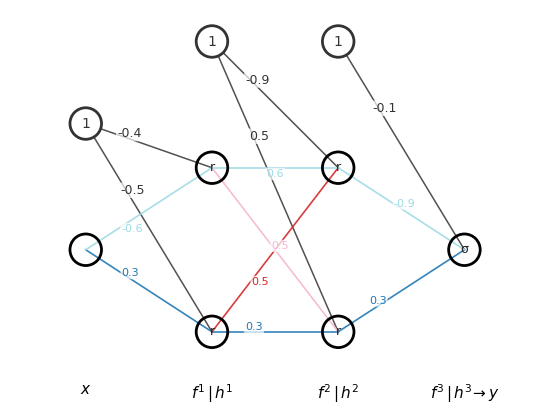

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Total number of parameters (weights + biases): 13


In [1]:
## Autoreload
%load_ext autoreload
%autoreload 2

# Import
from Skripte.Vjezba7.draw_nn import *

#========================================#
# Definicija ulaznih podataka
broj_neurona = [1, 2,2, 1]
aktivacijske_funkcije = ['-','r','r', 's']
#========================================#

mats, bias, n_params = draw_network(
    broj_neurona,
    seed=1993,
    print_weight_matrices=True,
    latex_weight_print = True,
    activations=aktivacijske_funkcije,
    indices_start=1,
    node_radius = 0.25,
    bias_radius = 0.25,
    bias_offset_factor = 2,
)

<font color='green'>


## Zadatak

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Za prethodno orignialni primjer s ulaznim parametrima: $[1, 2, 2, 1]$ i aktivacijama ['-','r','r','s'] odnosno *Ništa, ReLu, ReLU i Sigmoid* vrijede sljdeće formule za izračun propagacije prema naprijed u kojima $f$ označava predaktivacijsku vrijednost koja se računa kao suma svih ulaznih neurona ponderiranih težinama, dok h označava postaktivacijsku vrijednost promatranog neurona:

### Ulaz:
$$
h^0_1 = x
$$

Pre-aktivacija:
$$
\begin{aligned}
f^1_1 &= \Theta^0_{11}\, h^0_1 + b^0_1 \\
f^1_2 &= \Theta^0_{21}\, h^0_1 + b^0_2
\end{aligned}
$$

Post-aktivacija (ReLU):
$$
\begin{aligned}
h^1_1 &= \mathrm{ReLU}(f^1_1) = \max(0, f^1_1) \\
h^1_2 &= \mathrm{ReLU}(f^1_2) = \max(0, f^1_2)
\end{aligned}
$$


---

### Layer 1 → 2

Pre-aktivacija:
$$
\begin{aligned}
f^2_1 &= \Theta^1_{11}\, h^1_1 + \Theta^1_{21}\, h^1_2 + b^1_1 \\
f^2_2 &= \Theta^1_{12}\, h^1_1 + \Theta^1_{22}\, h^1_2 + b^1_2
\end{aligned}
$$

Post-aktivacija (ReLU):
$$
\begin{aligned}
h^2_1 &= \mathrm{ReLU}(f^2_1) = \max(0, f^2_1) \\
h^2_2 &= \mathrm{ReLU}(f^2_2) = \max(0, f^2_2)
\end{aligned}
$$


---

### Sloj 2 → 3

Pre-aktivacija:
$$
f^3_1 = \Theta^2_{11}\, h^2_1 + \Theta^2_{21}\, h^2_2 + b^2_1
$$

Post-aktivacija (Sigmoid):
$$
h^3_1 = \sigma(f^3_1) = \frac{1}{1 + e^{-f^3_1}}
$$


---

### Sumarno
$$
\boxed{
y = h^3_1 = \sigma\!\left(
  \Theta^2_{11}\, \mathrm{ReLU}\!\big(\Theta^1_{11}\, \mathrm{ReLU}(\Theta^0_{11}\,x+b^0_1)
                                     +\Theta^1_{21}\, \mathrm{ReLU}(\Theta^0_{21}\,x+b^0_2)
                                     +b^1_1\big)
 + \Theta^2_{21}\, \mathrm{ReLU}\!\big(\Theta^1_{12}\, \mathrm{ReLU}(\Theta^0_{11}\,x+b^0_1)
                                     +\Theta^1_{22}\, \mathrm{ReLU}(\Theta^0_{21}\,x+b^0_2)
                                     +b^1_2\big)
 + b^2_1
\right)}
$$

---

Idući programski kod izračunava propagaciju prema naprijed za danu neuronsku mrežu iz prethodnog zadatka. Vašje zadatak moći izračunati propagaciju prema naprijed za bilo koju neuronsku mrežu.



In [2]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Import
from Skripte.Vjezba7.forward_izracun import *

# 2) Forward trace (top→bottom)
#========================================#
# Definicija ulaznih podataka
x = np.array([1.5])  
#========================================#
f_vals, h_vals, *_ = forward_pass_trace_topdown(
    inputs=x,
    weights_mats=mats,
    biases = bias,
    activations=aktivacijske_funkcije,
    print_trace=True,
    latex_trace=True,
    hr=True
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

## Funkcija gubitka

Jednom kada je izračunat $\hat{y}$, odnosno izlaz iz neuronske mreže, potrebno je izračunati pogrešku. U ovoj vježbi implementirane su dvije funkcije cilja **Srednja kvadratna pogreška MSE** i **Binarna unakrsna-entropija BCE**. Njihove funkcije i dervacije su kako sljede:

**MSE**:

Dodaje se $\frac{1}{2}$ radi lakšeg deriviranja:
$
L_{\text{MSE}} = \frac{1}{2}(y - \hat{y})^2
$

Za batch se formula transformira u:
$
L_{\text{MSE}} = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$

dok derivacija glasi:
$
\frac{\partial L_{\text{MSE}}}{\partial \hat{y}} = \frac{1}{N}(\hat{y} - y)
$

*Ukoliko se zanemari $\frac{1}{2}$ faktor što je učestalo u nekim programskim knjižicama:*
$
L_{\text{MSE}} = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\quad \Longrightarrow \quad
\frac{\partial L_{\text{MSE}}}{\partial \hat{y}} = \frac{2}{N}(\hat{y} - y)
$

---
**BCE**:

Formula za jedan uzorak glasi:
$
L_{\text{BCE}} = -\left[ y \ln(\hat{y}) + (1 - y) \ln(1 - \hat{y}) \right]
$

dok za batch se formula proširuje na:
$
L_{\text{BCE}} = -\frac{1}{N}\sum_{i=1}^{N}\left[
y_i \ln(\hat{y}_i) + (1 - y_i)\ln(1 - \hat{y}_i)
\right]
$

Derivacija glasi:
$
\frac{\partial L_{\text{BCE}}}{\partial \hat{y}}
= -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)
= \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}
$

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>
Pokrenite idući programski kod koji temeljem izračunatog $y$ u prethodnom programskom kodu za dane vrijednosti $x$ računa $loss$.


In [3]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Import    
from Skripte.Vjezba7.loss import *
#========================================#
# Definicija ulaznih podataka
y = np.array([0.0])
loss = "bce" #"bce"
#========================================#

# Izračun
print("x:", x)
print("y_pred:", h_vals[-1])
print("y_true:", y)

l, a = loss_and_dh_out(h_vals[-1], y, loss)
print(f"Za loss funkciju {loss}, vrijednost gubitka je: {l}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
x: [1.5]
y_pred: [0.5124974]
y_true: [0.]
Za loss funkciju bce, vrijednost gubitka je: 0.7184596480132863


---

## Propagacija unatrag

Propagacija unatrag računa parcijalnu derivaciju funkcije cilja po svakom od parametara, odnosno $\frac{\delta L}{\delta \Theta}$. U navedenom primjeru koji prati ovu vježbu vrijede sljedći izrazi izračuna (propagacija unatrag (1–2–2–1, ReLU–ReLU–Sigmoid, BCE Loss))

#### Gradijenti funkcije cilja

$
\frac{\partial L}{\partial h^{(3)}} =
-\frac{y}{h^{(3)}} + \frac{1-y}{1-h^{(3)}}.
$

Budući da $( h^{(3)} = \sigma(f^{(3)}) )$ i $(\frac{d\sigma}{df} = \sigma(f)(1-\sigma(f)))$, dobiva se izraz
$
\frac{\partial L}{\partial f^{(3)}} =
\frac{\partial L}{\partial h^{(3)}} \cdot \frac{\partial h^{(3)}}{\partial f^{(3)}}
= \left(-\frac{y}{h^{(3)}} + \frac{1-y}{1-h^{(3)}}\right)
h^{(3)}(1-h^{(3)}).
$

Odnosno jednostavnije:

$
\boxed{\frac{\partial L}{\partial f^{(3)}} = h^{(3)} - y.}
$

---

#### Propagacija kroz skrivene slojeve

Za svaki skriveni sloj $( l = 2, 1 )$ računa e sljedeći izraz:

$
\frac{\partial L}{\partial h^{(l)}} =
(\Theta^{(l)})^\top \frac{\partial L}{\partial f^{(l+1)}},
$
$
\frac{\partial L}{\partial f^{(l)}} =
\frac{\partial L}{\partial h^{(l)}} \odot a'(f^{(l)}),
$

gdje $( a'(f^{(l)}))$ derivacija aktivacijeske funkcije, u ovom slučaju ReLU:

$
a'(f^{(l)}) =
\begin{cases}
1 & \text{if } f^{(l)} > 0, \\[4pt]
0 & \text{otherwise},
\end{cases}
\quad \text{for ReLU.}
$

---

#### Gradijenti parametara

Za svaki sloj $( l-1 )$ vrijedi:

$
\boxed{
\frac{\partial L}{\partial \Theta^{(l-1)}} =
(h^{(l-1)})^\top \frac{\partial L}{\partial f^{(l)}},
\qquad
\frac{\partial L}{\partial b^{(l-1)}} =
\frac{\partial L}{\partial f^{(l)}}.
}
$

Odnosno:
$
\frac{\partial L}{\partial \theta^{(l-1)}_{ij}} =
h^{(l-1)}_i \frac{\partial L}{\partial f^{(l)}_j}.
$

---

#### Propagacija unatrag cijele mreže


\begin{aligned}
\frac{\partial L}{\partial f^{(3)}} &= h^{(3)} - y, \\[4pt]
\frac{\partial L}{\partial \Theta^{(2)}} &= (h^{(2)})^\top \frac{\partial L}{\partial f^{(3)}}, &
\frac{\partial L}{\partial b^{(2)}} &= \frac{\partial L}{\partial f^{(3)}}, \\[4pt]
\frac{\partial L}{\partial h^{(2)}} &= (\Theta^{(2)}) \frac{\partial L}{\partial f^{(3)}}, \\[4pt]
\frac{\partial L}{\partial f^{(2)}} &= \frac{\partial L}{\partial h^{(2)}} \odot \mathbf{1}_{f^{(2)} > 0}, \\[4pt]
\frac{\partial L}{\partial \Theta^{(1)}} &= (h^{(1)})^\top \frac{\partial L}{\partial f^{(2)}}, &
\frac{\partial L}{\partial b^{(1)}} &= \frac{\partial L}{\partial f^{(2)}}, \\[4pt]
\frac{\partial L}{\partial h^{(1)}} &= (\Theta^{(1)}) \frac{\partial L}{\partial f^{(2)}}, \\[4pt]
\frac{\partial L}{\partial f^{(1)}} &= \frac{\partial L}{\partial h^{(1)}} \odot \mathbf{1}_{f^{(1)} > 0}, \\[4pt]
\frac{\partial L}{\partial \Theta^{(0)}} &= (h^{(0)})^\top \frac{\partial L}{\partial f^{(1)}}, &
\frac{\partial L}{\partial b^{(0)}} &= \frac{\partial L}{\partial f^{(1)}}.
\end{aligned}

In [4]:
# 3) Backward pass + derivative trace (MSE)
from Skripte.Vjezba7.backpropagation import *

_ = backward_pass_trace_topdown(
    inputs=x,
    weights_mats=mats,
    biases = bias,
    y_true=y,
    activations= aktivacijske_funkcije,
    loss= loss,
    indices_start=1,
    print_trace=True
)


 BACKWARD DERIVATIVE TRACE (top→bottom, LaTeX)

=== Layer 3 ===
dL/dh (post-activation):


<IPython.core.display.Math object>

dL/df (pre-activation):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

dL/dΘ (weights) in printed orientation (top row=1, left col=1):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

  (single-sample expansion: ∂L/∂Θ = h^{L-1} · ∂L/∂f^L, using cached tensors)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

dL/db (biases) (sum over batch):


<IPython.core.display.Math object>

dL/dh (previous layer) relation:


<IPython.core.display.Math object>


=== Layer 2 ===
dL/dh (post-activation):


<IPython.core.display.Math object>

dL/df (pre-activation):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

dL/dΘ (weights) in printed orientation (top row=1, left col=1):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

  (single-sample expansion: ∂L/∂Θ = h^{L-1} · ∂L/∂f^L, using cached tensors)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dL/db (biases) (sum over batch):


<IPython.core.display.Math object>

dL/dh (previous layer) relation:


<IPython.core.display.Math object>


=== Layer 1 ===
dL/dh (post-activation):


<IPython.core.display.Math object>

dL/df (pre-activation):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

dL/dΘ (weights) in printed orientation (top row=1, left col=1):


<IPython.core.display.Math object>

  (single-sample expansion: ∂L/∂Θ = h^{L-1} · ∂L/∂f^L, using cached tensors)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

dL/db (biases) (sum over batch):


<IPython.core.display.Math object>

dL/dh (previous layer) relation:


<IPython.core.display.Math object>


——— Summary ———


<IPython.core.display.Math object>

<IPython.core.display.Math object>